### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df = df.head(10000)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


### View descriptive stats

In [6]:
df.describe()

,review,sentiment
count,10000,10000
unique,9983,2
top,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
freq,2,5028


### Check for imbalanced data

In [7]:
df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

<Axes: ylabel='sentiment'>

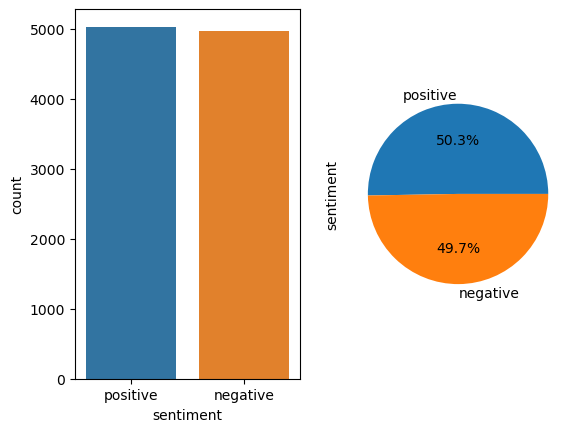

In [8]:
plt.subplot(1,2,1)
sns.countplot(x=df['sentiment'])

plt.subplot(1,2,2)
df['sentiment'].value_counts().plot(kind='pie',autopct = "%1.1f%%")

### Create a function to Preprocess the review column

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma =WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words]
    
    word = ' '.join(word)
    return word

### Print some text after applying the function

In [11]:
df['review'] =  df['review'].apply(preprocess)

In [12]:
for i in range(5):
    print(df['review'][i])
    print()

one reviewers mention watch 1 oz episode hook they right exactly happen br br the first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid this show pull punch regard drug sex violence its hardcore classic use word br br it call oz nickname give oswald maximum security state penitentary it focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy deal shady agreements never far away br br i would say main appeal show due fact go show dare forget pretty picture paint mainstream audiences forget charm forget romance oz mess around the first episode i ever saw strike nasty surreal i say i ready i watch i develop taste oz get accustom high level graphic violence not violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due l

### Split the dataset into Input (X) & Target (y) variable

In [13]:
x = df['review']
y = df['sentiment']

### Convert y variable values into 0 and 1 from positive and negative

In [14]:
y = y.apply(lambda x: 0 if x=='positive' else 1)

In [15]:
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: sentiment, Length: 10000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [17]:
tokenizer = Tokenizer(num_words=5000)

### Split the dataset into Training & Testing set

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Create keras Sequential Model with LSTM Layers

In [19]:
tokenizer.fit_on_texts(x_train)

In [20]:
vocab_size = len(tokenizer.word_index)+1

In [21]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence

In [22]:
x_train = text_encoding(x_train)
x_test = text_encoding(x_test)

In [23]:
from keras import Sequential
from keras import layers

In [24]:
model=Sequential([
    layers.Embedding(vocab_size,128),
    layers.LSTM(128,return_sequences=True),
    layers.Dropout(0.02),
    layers.LSTM(128),
    layers.Dropout(0.02),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.02),
    layers.Dense(1,activation='sigmoid')
])

### Compile the model

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =["accuracy"])

### Train the model with our training set

In [26]:
model.fit(x_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - accuracy: 0.6872 - loss: 0.5769 - val_accuracy: 0.8269 - val_loss: 0.4010
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.9129 - loss: 0.2412 - val_accuracy: 0.8281 - val_loss: 0.4235
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.9560 - loss: 0.1296 - val_accuracy: 0.8319 - val_loss: 0.4306
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9744 - loss: 0.0823 - val_accuracy: 0.8225 - val_loss: 0.5366
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.9825 - loss: 0.0605 - val_accuracy: 0.8075 - val_loss: 0.7005
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.9898 - loss: 0.0293 - val_accuracy: 0.8150 - val_loss: 0.7809
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.9912 - loss: 0.0265 - val_accuracy: 0.8106 - val_loss: 0.6828
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.9954 - loss: 0

### Make prediction with X_test

In [27]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


In [28]:
y_pred[0]

array([0.0056102], dtype=float32)

### Convert to 0 and 1 with higher probability towards 1

In [29]:
pred = []
for i in y_pred:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)

### Evaluate the model

In [30]:
model.evaluate(x_train,y_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9949 - loss: 0.0277


[0.19234226644039154, 0.9617499709129333]

### Check accuracy score

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
accuracy_score(y_test,pred)

0.8245

### Check confusion matrix

<Axes: >

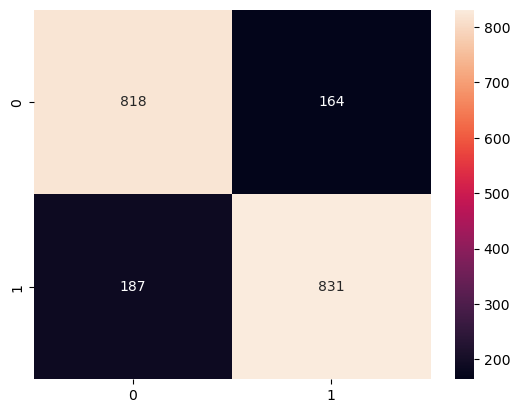

In [33]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

### Print Classification report

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       982
           1       0.84      0.82      0.83      1018

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



***